Krzysztof Swędzioł 418001 Lab8

In [2]:
using Pkg
Pkg.add("Roots")
Pkg.add("ForwardDiff")

    Updating registry at `C:\Users\feXi\.julia\registries\General.toml`
   Resolving package versions...
   Installed Accessors ──────── v0.1.36
   Installed CompositionsBase ─ v0.1.2
   Installed CommonSolve ────── v0.2.4
   Installed InverseFunctions ─ v0.1.14
   Installed Roots ──────────── v2.1.5
    Updating `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  [f2b01f46] + Roots v2.1.5
    Updating `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`
  [7d9f7c33] + Accessors v0.1.36
  [38540f10] + CommonSolve v0.2.4
  [a33af91c] + CompositionsBase v0.1.2
  [3587e190] + InverseFunctions v0.1.14
  [f2b01f46] + Roots v2.1.5
Precompiling project...
  ✓ CommonSolve
  ✓ CompositionsBase
  ✓ InverseFunctions
  ✓ InverseFunctions → DatesExt
  ✓ LogExpFunctions → LogExpFunctionsInverseFunctionsExt
  ✓ CompositionsBase → CompositionsBaseInverseFunctionsExt
  ✓ Unitful → InverseFunctionsUnitfulExt
  ✓ Accessors
  ✓ Accessors → AccessorsIntervalSetsExt
  ✓ Accessors → AccessorsStaticAr

In [6]:
Pkg.add("Measures")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Symbolics")

   Resolving package versions...
    Updating `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  [442fdcdd] + Measures v0.3.2
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
   Installed Bijections ──────────────── v0.1.6
   Installed EnumX ───────────────────── v1.0.4
   Installed TimerOutputs ────────────── v0.5.24
   Installed PDMats ──────────────────── v0.11.31
   Installed StatsFuns ───────────────── v1.3.1
   Installed LabelledArrays ──────────── v1.16.0
   Installed HypergeometricFunctions ─── v0.3.23
   Installed MutableArithmetics ──────── v1.4.4
   Installed PtrArrays

In [2]:
using Pkg
using Roots  
using Plots
using ForwardDiff
using LinearAlgebra
using Statistics
using Measures
using DataFrames
using CSV
using Symbolics

Zadanie 1 A

Do analizy dla metody wykorzystującej przedział i zmianę znaku wybrałem metodę bisekcji - opiera się ona na wyborze początkowego przedziału i w tym przedziale zawsze wybieramy punkt będący średnią krańców i wybieramy takie nowe krańce przedziału, dla których wartości funkcji mają przeciwne znaki.

Dla metody wykorzystującej pochodną - Metoda Newtona - opiera się ona na fakcie że styczna do wykresu w miejscu zerowym, też ma tam miejsce zerowe. Polega ona na liczeniu pochodnej i sprawdzaniu w którym miejscu wykres będący styczną ma miejsce zerowe i od tego momentu badamy w tym właśnie punkcie. Proces powtarzamy do znalezienia miejsca zerowego

Dla metody przybliżania pochodnej - Podajemy punkt startowy(a) i na jego podstawie obliczamy drugi punkt(b) będący wartością funkcji w punkcie startowym oraz trzeci(c) punkt będący wartością funkcji w drugim punkcie. następnie korzystając ze wzoru obliczamy p = a - (b - a )^2 / (c - 2b + a) które będzie naszym nowym punktem startowym. Proces powtarzamy do znalezienia miejsca zerowego

In [10]:
function createDF(functions, df, bisection, newtonMethod, steffenson, tracker)
    for func in functions
        res1 = bisection(func)
        if func(res1) != 0
            println("Error while ",func," ", bisection," ", func(res1))
        end
        push!(df,(func,bisection,tracker.steps,tracker.fncalls))
        res2 = newtonMethod(func)
        if func(res2) != 0
            println("Error while ",func," ", newtonMethod," ", func(res2))
        end
        push!(df,(func,newtonMethod,tracker.steps, tracker.fncalls))
        res3 = steffenson(func)
        if func(res3) != 0
            println("Error while ",func," ", steffenson," ", (res3))
        end
        push!(df,(func,steffenson,tracker.steps, tracker.fncalls))
    end
    return df
end


function1(x) = 2*x-exp(-x)
function2(x) = 20.0*x/(100.0*x*x + 1.0)
function3(x) = (x+3)*(x-1)^2
function4(x) =  cos(x) - x
function5(x) =  x*exp(-x)
function6(x) = sin(x) - x/2

functions = Function[]

push!(functions, function1)
push!(functions, function2)
push!(functions, function3)
push!(functions, function4)
push!(functions, function5)
push!(functions, function6)

df = DataFrame(Func=Function[],Method=Function[],Iterations=Float64[],Calls=Float64[])
tracker = Roots.Tracks()

#Funkcja do znajdowania miejsca zerowego metodą bisekcji 
bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker)

#Funkcja do znajdowania miejsc zerowych metodą Newtona 
D(f) = x->ForwardDiff.derivative(f, float(x))
newtonMethod(f) = find_zero((f, D(f)),0, Roots.Newton(),tracks = tracker)

#Funkcja do znajdowania miejsc zerowych metodą Steffensona
steffenson(f) = find_zero(f, 0, Order2(),tracks = tracker)

createDF(functions, df, bisection, newtonMethod, steffenson, tracker)
df



Error while function1 newtonMethod -1.1102230246251565e-16
Error while function3 newtonMethod 4.564959859473074e-16
Error while function3 steffenson 0.9999999882918915


Row,Func,Method,Iterations,Calls
,Function,Function,Float64,Float64
1,function1,bisection,61.0,64.0
2,function1,newtonMethod,65.0,72.0
3,function1,steffenson,70.0,81.0
4,function2,bisection,70.0,84.0
5,function2,newtonMethod,71.0,86.0
6,function2,steffenson,71.0,88.0
7,function3,bisection,71.0,91.0
8,function3,newtonMethod,97.0,143.0
9,function3,steffenson,125.0,193.0


Zadanie 1 B
Przykład trudnej funkcji - funkcja 2 z podpunktu a - ma dużo nieoczywistych zmian w swoim przebiegu

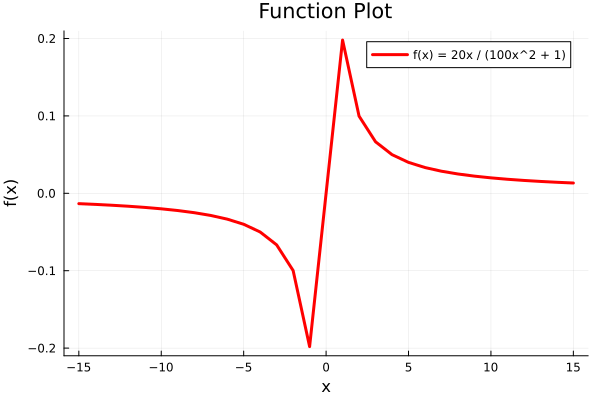

In [35]:
function2(x) = 20.0*x/(100.0*x*x + 1.0)
plot(function2, domain, linewidth=3, color=:red, 
     label="f(x) = 20x / (100x^2 + 1)", xlabel="x", ylabel="f(x)", title="Function Plot")

In [36]:
domain = -15:15
results = DataFrame(Func=Function[],Iterations=Float64[],Calls=Float64[])



bisection(function2)
push!(results,(bisection, tracker.steps, tracker.fncalls))

newtonMethod(function2)
push!(results,(newtonMethod,tracker.steps, tracker.fncalls))

steffenson(function2)
push!(results,(steffenson, tracker.steps, tracker.fncalls))


Row,Func,Iterations,Calls
,Function,Float64,Float64
1,bisection,200.0,307.0
2,newtonMethod,201.0,309.0
3,steffenson,201.0,311.0


Zadanie 1 podpunkt c

Bisekcja - Bisekcja zakłada że funkcja jest ciągła w badanym przedziale [a, b] oraz że wartości funkcji w a i b są przeciwnych znaków.
Jeśli warunki te nie są spełnione, bisekcja nie zadziała.

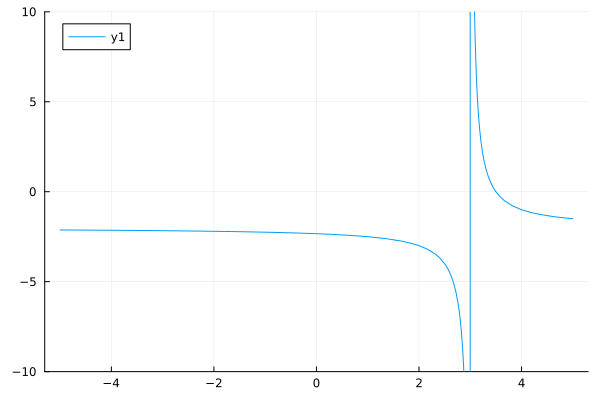

In [6]:
f(x) = 1/(x-3) - 2
xs = -2:2
plot(f, ylim = (-10,10))

Dla tej funkcji miejsce zerowe to 7/2 = 3,5. No to użyjmy bisekcji na przedziale [2, 4], gdzie funkcja w pewnym momencie nie jest ciągła 
lub nie spełnia warunku o zmiennych znakach.

In [4]:
res = find_zero(f,(2,4),Bisection()) # funkcja nie ma przeciwnych znaków
f(res)

ArgumentError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Metoda Newtona - W tym przypadku możemy mieć problem z pochodną, która na przykład może być całkowicie pionowa lub nie istnieć.


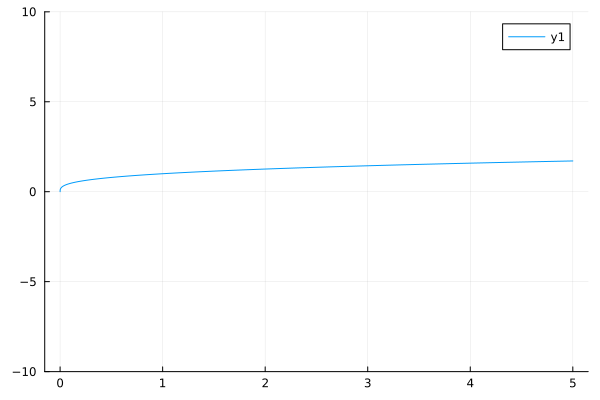

In [7]:
f(x) = x^(1/3)
xs = -2:2
plot(f, ylim = (-10,10))

Dla tej funkcji pochodna to f'(x) = 1/3x^(-2/3). W punkcie x staje się ona nieskończona

In [8]:
Deriv(f) = x->ForwardDiff.derivative(f, float(x))
newtonMethod(f) = find_zero((f, Deriv(f)),0, Roots.Newton(),tracks = tracker)

newtonMethod (generic function with 1 method)

Steffenson - tak jak przy bisekcji, nie zadziała jeśli funkcja nie jest ciągła

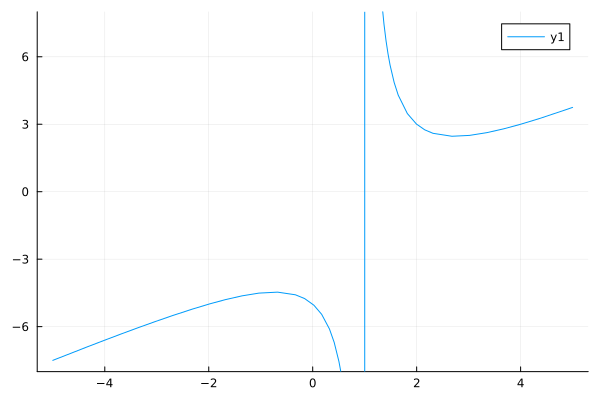

In [20]:
f(x) = x + 3/(x-1) - 2
xs = -1:2
plot(f, ylim = (-8,8))

In [17]:
f(x) = x/(x-1) - 1
res3 = steffenson(f) 
f(res3)

-2.5416772276853905e-6

Zadanie 2 - Wstęga Newtona

Wstęga Newtona:
Gdy wyznaczymy sobie kilka prawdziwych miejsc zerowych na płaszczyźnie urojonej a następnie każdemu z nich przypiszemy jakiś kolor, możemy stworzyć zbiór bardzo dużej
ilości punktów, które będziemy traktować jako startowe dla metody Newtona do znajdowania pierwiastków. Jak wiemy, przy szukaniu pierwiastka używając wspomnianej metody,
czasem zdarza się tak że x bardzo długo "odbija się w lewo i prawo" zanim znajdzie właściwe miejsce. Robiąc to na płaszczyźnie urojonej możemy zaobserwować jak tworzą one 
fraktal o nazwie Wstęga Newtona.

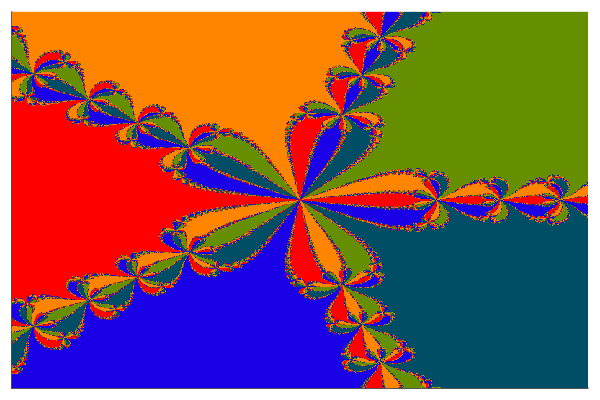

In [41]:

f(x) = x^5 + 3
function get_map(f)
    @variables x
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    update_expr = build_function(map, x)
    return eval(update_expr)
end
function applyiteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end
update = get_map(f)
lower = -2 - 2im
upper = 2 + 2im
step = 0.5e-2
Z0 = [a+b*im for b in real(lower):step:real(upper),
                    a in imag(lower):step:imag(upper)]
Z100 = applyiteratively.(Z0, update)
heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)